In [2]:
import tensorflow as tf
print(tf.__version__)

2.9.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
insurance["sex"]

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [7]:
insurance["smoker"]

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [8]:
insurance["region"]

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

In [9]:
insurance["smoker"], insurance["age"]

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [13]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [15]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [16]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [18]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [20]:
# Create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [21]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [22]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                       optimizer = tf.keras.optimizers.SGD(),
                       metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7792.0229 - mae: 7792.0229
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7748.3892 - mae: 7748.3892
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7595.3945 - mae: 7595.3945
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7589.9849 - mae: 7589.9849
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7698.5591 - mae: 7698.5591
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7496.7788 - mae: 7496.7788
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7493.1733 - mae: 7493.1733

34/34 [==============================] - 0s 4ms/step - loss: 7176.5210 - mae: 7176.5210
Epoch 83/100
34/34 [==============================] - 0s 4ms/step - loss: 7425.6294 - mae: 7425.6294
Epoch 84/100
34/34 [==============================] - 0s 4ms/step - loss: 7403.1289 - mae: 7403.1289
Epoch 85/100
34/34 [==============================] - 0s 4ms/step - loss: 7356.0088 - mae: 7356.0088
Epoch 86/100
34/34 [==============================] - 0s 4ms/step - loss: 7484.7271 - mae: 7484.7271
Epoch 87/100
34/34 [==============================] - 0s 4ms/step - loss: 7217.6074 - mae: 7217.6074
Epoch 88/100
34/34 [==============================] - 0s 4ms/step - loss: 7261.0000 - mae: 7261.0000
Epoch 89/100
34/34 [==============================] - 0s 4ms/step - loss: 7134.1558 - mae: 7134.1558
Epoch 90/100
34/34 [==============================] - 0s 4ms/step - loss: 7083.4351 - mae: 7083.4351
Epoch 91/100
34/34 [==============================] - 0s 4ms/step - loss: 7254.1782 - mae: 7254.1782
Epo

In [23]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

In [27]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

### Right now looks like our model isn't performing too well ... let's try and improve it

To  (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units and use the Adam optimizer
2. Same as above but train for longer (200 epochs)
3. insert your own experiment here

In [31]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [32]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4924.4961 - mae: 4924.4961


[4924.49609375, 4924.49609375]

In [34]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

In [39]:
# Model 3
# Set random set
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12749.5410 - mae: 12749.5410
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 10905.8164 - mae: 10905.8164
Epoch 6/200
34/34 [==============================] - 0s 5ms/step - loss: 9457.7227 - mae: 9457.7227
Epoch 7/200
34/34 [==============================] - 0s 6ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/200
34/34 [==============================] - 0s 6ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/200
34/34 [==============================] - 0s 6ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 6ms/step - loss: 7409.0811 - mae:

34/34 [==============================] - 0s 6ms/step - loss: 5834.3066 - mae: 5834.3066
Epoch 83/200
34/34 [==============================] - 0s 6ms/step - loss: 5805.8242 - mae: 5805.8242
Epoch 84/200
34/34 [==============================] - 0s 5ms/step - loss: 5772.3232 - mae: 5772.3232
Epoch 85/200
34/34 [==============================] - 0s 5ms/step - loss: 5745.1514 - mae: 5745.1514
Epoch 86/200
34/34 [==============================] - 0s 5ms/step - loss: 5711.3477 - mae: 5711.3477
Epoch 87/200
34/34 [==============================] - 0s 5ms/step - loss: 5674.5215 - mae: 5674.5215
Epoch 88/200
34/34 [==============================] - 0s 5ms/step - loss: 5639.4927 - mae: 5639.4927
Epoch 89/200
34/34 [==============================] - 0s 5ms/step - loss: 5600.6655 - mae: 5600.6655
Epoch 90/200
34/34 [==============================] - 0s 5ms/step - loss: 5559.4326 - mae: 5559.4326
Epoch 91/200
34/34 [==============================] - 0s 5ms/step - loss: 5523.6187 - mae: 5523.6187
Epo

34/34 [==============================] - 0s 5ms/step - loss: 3725.0784 - mae: 3725.0784
Epoch 163/200
34/34 [==============================] - 0s 5ms/step - loss: 3722.1680 - mae: 3722.1680
Epoch 164/200
34/34 [==============================] - 0s 5ms/step - loss: 3726.4907 - mae: 3726.4907
Epoch 165/200
34/34 [==============================] - 0s 4ms/step - loss: 3717.1106 - mae: 3717.1106
Epoch 166/200
34/34 [==============================] - 0s 5ms/step - loss: 3721.8940 - mae: 3721.8940
Epoch 167/200
34/34 [==============================] - 0s 5ms/step - loss: 3720.7314 - mae: 3720.7314
Epoch 168/200
34/34 [==============================] - 0s 6ms/step - loss: 3715.3098 - mae: 3715.3098
Epoch 169/200
34/34 [==============================] - 0s 6ms/step - loss: 3714.2400 - mae: 3714.2400
Epoch 170/200
34/34 [==============================] - 0s 6ms/step - loss: 3708.1538 - mae: 3708.1538
Epoch 171/200
34/34 [==============================] - 0s 6ms/step - loss: 3707.5679 - mae: 3707

In [40]:
# Evaluate the larger model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3488.7854 - mae: 3488.7854


[3488.785400390625, 3488.785400390625]

In [41]:
insurance_model_3.evaluate(X_train, y_train)

34/34 [==============================] - 0s 2ms/step - loss: 3663.1772 - mae: 3663.1772


[3663.17724609375, 3663.17724609375]

In [42]:
insurance_model.evaluate(X_test, y_test), insurance_model_2.evaluate(X_test, y_test), insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3488.7854 - mae: 3488.7854


([7023.32861328125, 7023.32861328125],
 [4924.49609375, 4924.49609375],
 [3488.785400390625, 3488.785400390625])

Text(0.5, 0, 'epochs')

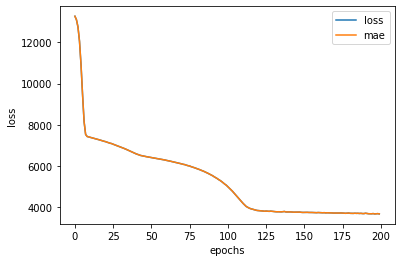

In [43]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**Question:** How long should you train for?

It depends on the problem you're working on. However, many people have asked this question before ... so TensorFlow has a solution ... It's call the [EarlyStopping Callback], which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metrics.

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

In [44]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


<AxesSubplot:ylabel='Frequency'>

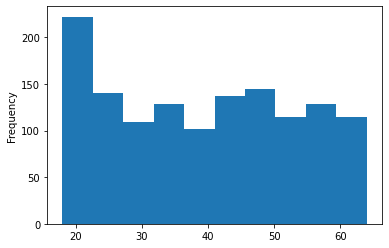

In [47]:
X["age"].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

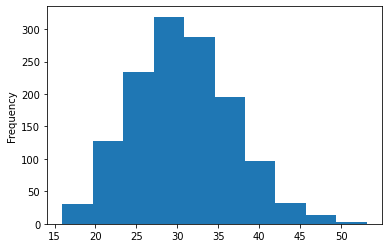

In [48]:
X["bmi"].plot(kind="hist")

In [49]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64